In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [3]:
data = pd.read_csv("WineQT.csv")

In [4]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [5]:
X = data.drop(['Id','quality'], axis=1)
y = data.quality
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 1. Зниження розмірності і візуалізація даних


#### Застосуйте методи зниження розмірності sklearn.decomposition.PCA і sklearn.manifold.TSNE для візуалізації даних, з якими ви працювали в лабораторній № 1 (знижуючи розмірність до двох). Візуалізуйте результат.

## PCA

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [6]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

In [7]:
exp_var_pca

array([0.28692345, 0.17075104])

In [8]:
cum_sum_eigenvalues

array([0.28692345, 0.45767448])

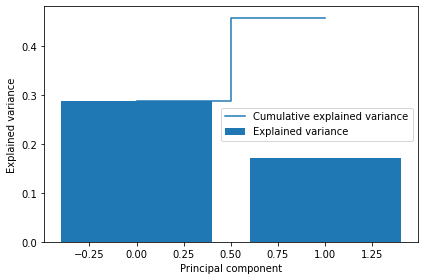

In [9]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [16]:
principal_breast_Df = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2'])

<Figure size 432x288 with 0 Axes>

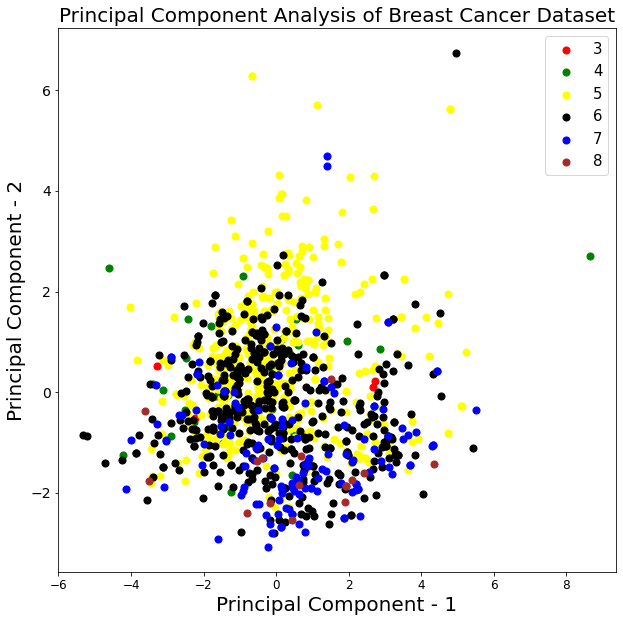

In [31]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = sorted(data.quality.unique())
colors = ['r', 'g','yellow','black','blue','brown']
for target, color in zip(targets,colors):
    indicesToKeep = data.quality == target
    plt.scatter( principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

## TSNE

C:\Users\Sofi\opencv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sofi\opencv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

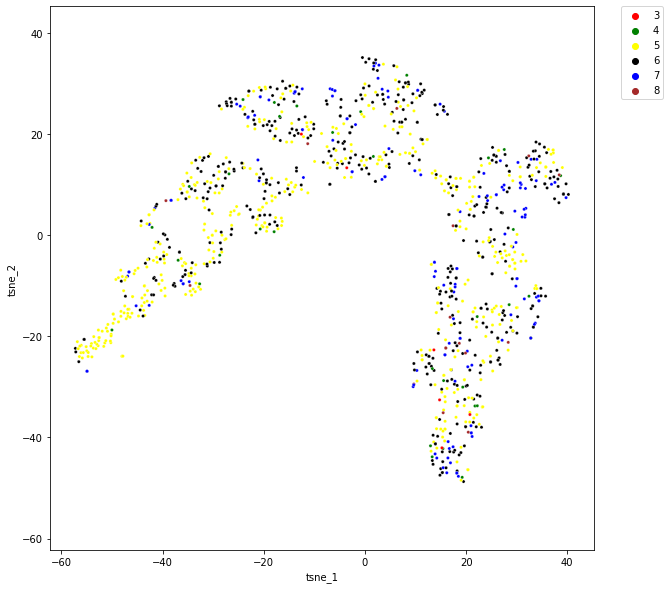

In [33]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1,figsize=(10,10))

sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10,palette=colors)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [20]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

# 2. Кластерний аналіз

#### 1) За допомогою алгоритму k-means зробіть квантування зображення (видалення візуально надлишкової інформації) з глибиною 64, 32, 16 та 8 рівнів для будь-якого обраного самостійно зображення.


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle


In [9]:
img = plt.imread("img.jpg")

In [10]:
img = np.array(img, dtype=np.float64) / 255

In [11]:
image_array

array([[159, 133, 170],
       [159, 133, 170],
       [159, 133, 170],
       ...,
       [ 91,  72,  74],
       [ 82,  63,  67],
       [ 85,  68,  74]], dtype=uint8)

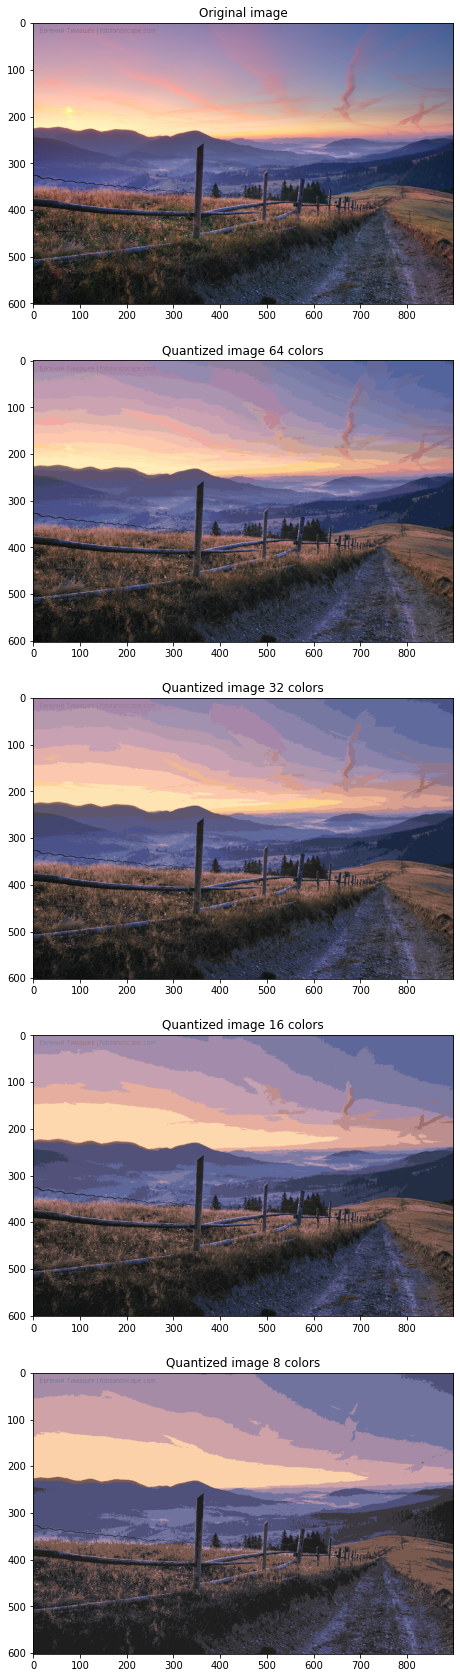

In [23]:
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w * h, d))

fig, axs = plt.subplots(5, 1, figsize=(45,30))

axs[0].imshow(img)
axs[0].set_title("Original image")

for ax, n_colors in zip(axs[1:], [64, 32, 16, 8]):

    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

    # Get labels for all points
    labels = kmeans.predict(image_array)

    
    def recreate_image(codebook, labels, w, h):
        """Recreate the (compressed) image from the code book & labels"""
        return codebook[labels].reshape(w, h, -1)

    
    ax.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    ax.set_title(f"Quantized image {n_colors} colors")
   # ax.grid(True)

plt.show()

# 3. Обробка та класифікація текстових даних

#### Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості. 

### Завантаження даних. Джерело: https://github.com/sebischair/medical-abstracts-tc-corpus

In [8]:
train_data = pd.read_csv(r"Medical-Abstracts-TC-Corpus-main/medical_tc_train.csv")
test_data = pd.read_csv(r"Medical-Abstracts-TC-Corpus-main/medical_tc_test.csv")

classes = pd.read_csv(r"Medical-Abstracts-TC-Corpus-main/medical_tc_labels.csv")

In [35]:
test_data.head()

,condition_label,medical_abstract
0,3,Obstructive sleep apnea following topical orop...
1,5,Neutrophil function and pyogenic infections in...
2,5,A phase II study of combined methotrexate and ...
3,1,Flow cytometric DNA analysis of parathyroid tu...
4,4,Paraneoplastic vasculitic neuropathy: a treata...


In [36]:
classes

,condition_label,condition_name
0,1,neoplasms
1,2,digestive system diseases
2,3,nervous system diseases
3,4,cardiovascular diseases
4,5,general pathological conditions


<Axes: >

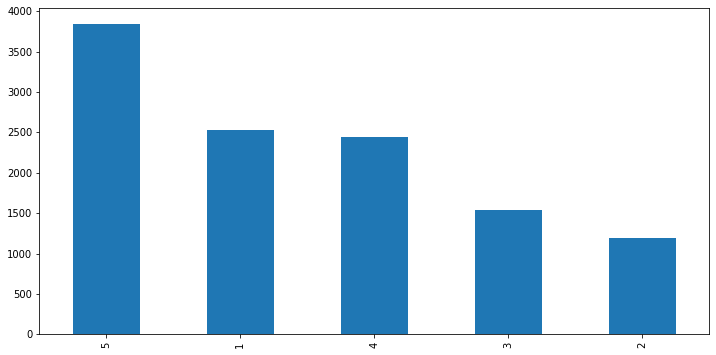

In [37]:
plt.figure(figsize=(12,6))

train_data['condition_label'].value_counts().plot.bar()

### Попередня обробка

In [6]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
nltk.download('all')
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Sofi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Sofi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Sofi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Sofi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Sofi\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

#### Видалення стоп-слів, пунктуації

In [9]:
def clean_text(text):
    
    clear_text = []
    for i in range(len(text)):

        r = re.sub('[^a-zA-Z]', ' ', text[i])
        r = r.lower()
        r = r.split()
        r = [word for word in r if (word not in stopwords.words('english') and len(word)>2)]
        r = [lemmatizer.lemmatize(word) for word in r]
        r = ' '.join(r)
        clear_text.append(r)
    return clear_text

train_data['clear_medical_abstract'] = clean_text(list(train_data['medical_abstract']))
test_data['clear_medical_abstract'] = clean_text(list(test_data['medical_abstract']))


train_data.head()

,condition_label,medical_abstract,clear_medical_abstract
0,5,Tissue changes around loose prostheses. A cani...,tissue change around loose prosthesis canine m...
1,1,Neuropeptide Y and neuron-specific enolase lev...,neuropeptide neuron specific enolase level ben...
2,2,"Sexually transmitted diseases of the colon, re...",sexually transmitted disease colon rectum anus...
3,1,Lipolytic factors associated with murine and h...,lipolytic factor associated murine human cance...
4,3,Does carotid restenosis predict an increased r...,carotid restenosis predict increased risk late...


#### Візуалізація найбільш поширених слів

In [10]:
words = " ".join(list(train_data['clear_medical_abstract'])).split()

fdist1 = FreqDist(words)
#print(fdist1.most_common())

<Axes: xlabel='word', ylabel='freq'>

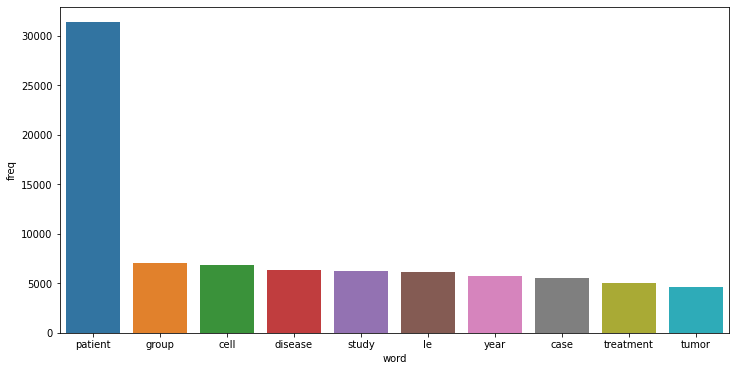

In [130]:
plt.figure(figsize=(12,6))

word_freq = pd.DataFrame()
word_freq['word'] = [word[0] for word in fdist1.most_common()]
word_freq['freq'] = [word[1] for word in fdist1.most_common()]

word_freq = word_freq.sort_values(by ='freq', ascending = 0 )

sns.barplot(x = word_freq['word'][:10], y = word_freq['freq'][:10])

#### Векторизація

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(train_data['clear_medical_abstract'])
X_test = vectorizer.transform(test_data['clear_medical_abstract'])

y_train = train_data.condition_label
y_test =  test_data.condition_label


#### Класифікація

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

classifier = LogisticRegression(max_iter=500).fit(X_train,y_train)

y_pred = classifier.predict(X_test)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [119]:
classifier

LogisticRegression(max_iter=500)

In [120]:
print(report)

              precision    recall  f1-score   support

           1       0.68      0.72      0.70       633
           2       0.49      0.35      0.41       299
           3       0.55      0.39      0.46       385
           4       0.64      0.64      0.64       610
           5       0.45      0.52      0.49       961

    accuracy                           0.56      2888
   macro avg       0.56      0.53      0.54      2888
weighted avg       0.56      0.56      0.55      2888



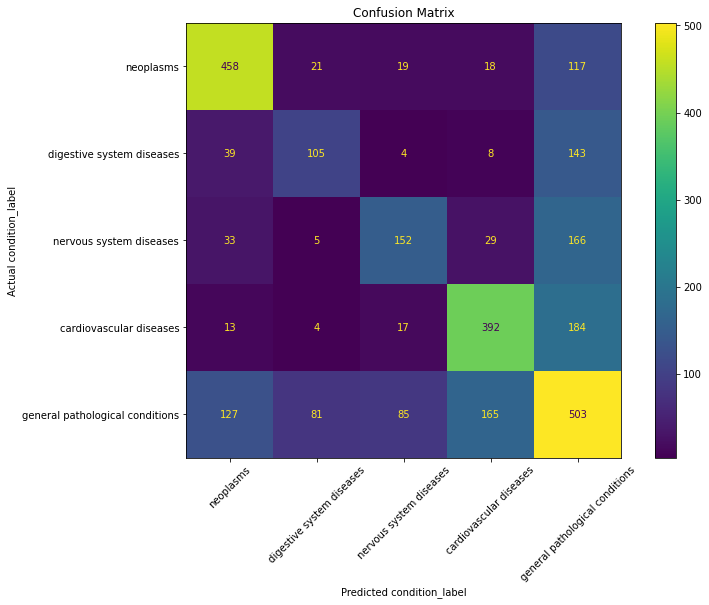

In [137]:
plt.rcParams["figure.figsize"] = (12,8)

cmd_obj= ConfusionMatrixDisplay(cm, display_labels=classes.condition_name)
cmd_obj.plot(xticks_rotation=45)
cmd_obj.ax_.set(
                    title= "Confusion Matrix", 
                    xlabel='Predicted condition_label', 
                    ylabel='Actual condition_label')
plt.show()